# Natural language processing: tokenisation, vectorisation and word embeddings #
Notebook looking at tokenisation and word embeddings. Further explanation of word2vec provided at https://arxiv.org/pdf/1411.2738.pdf.

## 1/. Tokenisation and vectorisation

In [1]:
import numpy as np
import pandas as pd
import sklearn
import nltk

In [2]:
#!pip install scikit-learn
#!pip install -U gensim
#nltk.download("all")

Language in machine learning models is usually broken down/tokenised where each word, sentence of phrase is classed as a token. W can manually read in a book and clean the text so that we only retain certain words. 

In [5]:
filename = 'moby_dick.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# convert to lowercase
words = [word.lower() for word in words]
# printing the first 100 words
print(words[0:100]) 

['**the', 'project', 'gutenberg', 'etext', 'of', 'moby', 'dick,', 'by', 'herman', 'melville**', '#3', 'in', 'our', 'series', 'by', 'herman', 'melville', 'this', 'project', 'gutenberg', 'version', 'of', 'moby', 'dick', 'is', 'based', 'on', 'a', 'combination', 'of', 'the', 'etext', 'from', 'the', 'eris', 'project', 'at', 'virginia', 'tech', 'and', 'another', 'from', 'project', "gutenberg's", 'archives,', 'as', 'compared', 'to', 'a', 'public-domain', 'hard', 'copy.', 'copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world,', 'be', 'sure', 'to', 'check', 'the', 'copyright', 'laws', 'for', 'your', 'country', 'before', 'posting', 'these', 'files!!', 'please', 'take', 'a', 'look', 'at', 'the', 'important', 'information', 'in', 'this', 'header.', 'we', 'encourage', 'you', 'to', 'keep', 'this', 'file', 'on', 'your', 'own', 'disk,', 'keeping', 'an', 'electronic', 'path']


However, we can also use library nltk which has a tokenize program which can handle .txt files and more. 

In [7]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
#performs slightly finer-grain tokenising
print(tokens[0:100])

['*', '*', 'The', 'Project', 'Gutenberg', 'Etext', 'of', 'Moby', 'Dick', ',', 'by', 'Herman', 'Melville', '*', '*', '#', '3', 'in', 'our', 'series', 'by', 'Herman', 'Melville', 'This', 'Project', 'Gutenberg', 'version', 'of', 'Moby', 'Dick', 'is', 'based', 'on', 'a', 'combination', 'of', 'the', 'etext', 'from', 'the', 'ERIS', 'project', 'at', 'Virginia', 'Tech', 'and', 'another', 'from', 'Project', 'Gutenberg', "'s", 'archives', ',', 'as', 'compared', 'to', 'a', 'public-domain', 'hard', 'copy', '.', 'Copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', ',', 'be', 'sure', 'to', 'check', 'the', 'copyright', 'laws', 'for', 'your', 'country', 'before', 'posting', 'these', 'files', '!', '!', 'Please', 'take', 'a', 'look', 'at', 'the', 'important', 'information', 'in', 'this', 'header', '.', 'We', 'encourage']


Same idea can be repeated for sentences...

In [8]:
sentences = nltk.sent_tokenize(text) 
print(len(sentences))
print(sentences[1000:1002])

9942
['From\nthence it is the God of breezes fair or foul is first invoked for\nfavourable winds.', "Yes, the world's a ship on its passage out, and not\na voyage complete; and the pulpit is its prow."]


Say we have a corpus of data like a book. The book contains words, which form phrases/sentences. 
- We can perform some primary statistical measures of the words in a given corpus using basic counts or term frequency-inverse document frequency (tf-idf). This can give insight into the importance of the words.
- Each unqiue word in the book, is part of a vocabulary `vocab`. We can represent each of these words as a vector of length `len(vocab)`, based on its counts/tf-idf values.

**Counts**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents. We call the sentences/phrases documents here, the collection of which froms the text.
text = ["The quick brown fox jumped over the lazy dog.",
 "The dog is over the moon",
 "The fox"]
c_vectorizer = CountVectorizer()
c_vec_fit=c_vectorizer.fit(text)
matrix_c_vec = c_vectorizer.transform(text)
#Below we print out a row (documents) vs. column (possible words) matrix, where each cell corresponds to the word count in the document.
print(matrix_c_vec.toarray())

[[1 1 1 0 1 1 0 1 1 2]
 [0 1 0 1 0 0 1 1 0 2]
 [0 0 1 0 0 0 0 0 0 1]]


The output therefore provides a simple matrix of row vectors: the rows defined by the documents in the text, and these row vector elements by the counts.    

**tf-idf**

Terms "tf" and "idf"  (https://en.wikipedia.org/wiki/Tf%E2%80%93idf) can have different definitions and sklearn's are described below.

- tf(doc, term) stands for term frequency. In sklearn this simply means the number of times the "term" appears in the selected "doc". E.g. in doc = text[1], term="the" appears twice, hence tf(text[1],"the") =2.
- idf stands for inverse document frequency. To calculate each terms idf value using formula `np.log((N+1)/(df+1))+1` where $N$ is number of documents in the corpus(corpus being `text`) and $df$ is the number of documents in the corpus that contain the specific term. Note this value is independent of specific words appearing in the documents.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
 "The dog is over the moon",
 "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# # encode document
vector_test = vectorizer.transform([text[1]])
print(vector_test)
# summarize encoded vector
print(vector_test.shape)
print(vector_test.toarray())

{'the': 9, 'quick': 8, 'brown': 0, 'fox': 2, 'jumped': 4, 'over': 7, 'lazy': 5, 'dog': 1, 'is': 3, 'moon': 6}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.        ]
  (0, 9)	0.5536419417527538
  (0, 7)	0.3564574014762071
  (0, 6)	0.46869864635920433
  (0, 3)	0.46869864635920433
  (0, 1)	0.3564574014762071
(1, 10)
[[0.         0.3564574  0.         0.46869865 0.         0.
  0.46869865 0.3564574  0.         0.55364194]]


- In the text saved above there is 10 unique words, and upon applying the tf-idf vecotrizer, each vector component is assigned to a word/token. This is accessed through attribute `vocabulary_`. 

- The `idf_` attribute returns inverse document frequency values per word.

- Note in `text[1]`, which is what we transform in `vector_test`, there are 2 "the", 1 "dog", 2 "fox" and 1 everything else. So naturally, there are only three unique numerical weight values. Why do they take these values? https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/

In [17]:
# N = Number of documents in corpus/text. idf_list appends all the different idf values. The number of unique values corresponds to the number of 
# unique word counts. We have counts 1 (e.g. "quick"), 2 (e.g. "dog") and 3 ("the")
N=3
idf_list=[]
for df in [1,2,3]:
    idf=np.log((N+1)/(df+1))+1
    idf_list.append(idf)
print(idf_list)

[1.6931471805599454, 1.2876820724517808, 1.0]


To calculate the component of the transformed/encoded vector for each document in the text, we take each words' idf and multiply it by the words' tf (that is term frequency and here it is simply the number of times the term appears in the chosen document). This result we set as the "term" component of the vector. Importantly the end vector is normalised  as $||v|| = \sqrt{v \cdot v} = 1$. As an explicit example, take document `text[1]` and let us calculate its transformed vector representation.

In [18]:
norm_text1 = np.sqrt((2*idf_list[2])**2 + (1*idf_list[1])**2 +(1*idf_list[1])**2 + (1*idf_list[0])**2 + (1*idf_list[0])**2 )
#print(norm_text1)
print(idf_list[2]*2/norm_text1)# Corresponds to "the". Note the factor of 2, since tf(text[1],"the") = 2 i.e. "the" appears twice in document text[1]
print(idf_list[1]*1/norm_text1)# Corresponds to "dog" and "over"
print(idf_list[0]*1/norm_text1)# Corresponds to "is" and "moon"

0.5536419417527538
0.3564574014762071
0.46869864635920433


These are the entries that appear in the corresponding vector.

Running the transform on the whole text and formatting into an array, the arrays rows are the document, while its columns are all the possible words from the corpus/text. The cell values are the tf-idf values as we have seen above.

In [19]:
vector = vectorizer.transform(text)
print(vector)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

  (0, 9)	0.44235918641789485
  (0, 8)	0.374489604639125
  (0, 7)	0.28480899696733925
  (0, 5)	0.374489604639125
  (0, 4)	0.374489604639125
  (0, 2)	0.28480899696733925
  (0, 1)	0.28480899696733925
  (0, 0)	0.374489604639125
  (1, 9)	0.5536419417527538
  (1, 7)	0.3564574014762071
  (1, 6)	0.46869864635920433
  (1, 3)	0.46869864635920433
  (1, 1)	0.3564574014762071
  (2, 9)	0.6133555370249717
  (2, 2)	0.7898069290660905
(3, 10)
[[0.3744896  0.284809   0.284809   0.         0.3744896  0.3744896
  0.         0.284809   0.3744896  0.44235919]
 [0.         0.3564574  0.         0.46869865 0.         0.
  0.46869865 0.3564574  0.         0.55364194]
 [0.         0.         0.78980693 0.         0.         0.
  0.         0.         0.         0.61335554]]


Like the standard counts, tf-idf therefore produces a matrix of document row vectors, each vector component corresponding to the tf-idf value of a given word. 

Both counts and tf-idf provide a way of transforming text data to numerical data such that it can be passed into NLP algorithms. The downside of these input values is that they do not carry with them semantic information (at least directly). For that reason, we look to word embeddings.

## 2/. Word embeddings ##

Word embedding means representing words appearing in a corpus, as a real valued vector in an alternative dimensional vector space. The process is able to capture inter-word semantics. The vocabulary vectors can then be processed using machine learning techniques.

The method involves iteration over a corpus of text to learn the association between the words. It relies on a hypothesis that the neighboring words in a text have semantic similarities with each other. It assists in mapping semantically similar words to geometrically close embedding vectors and uses the cosine metric to measure semantic similarity. Cosine similarity is equal to Cos(angle) where the angle is measured between the vector representation of two words/documents.

**word2vec**

Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

There are two word2vec architectures: continuous bag of words (CBOW) and Skip-gram. Using context words to predict a target word is the CBOW architecture, while using a single input word to predict a target context set of words, is called skip-gram. When the feature vector assigned to a word cannot be used to accurately predict that word’s context, the components of the vector are adjusted. Each word’s context in the corpus is the "teacher" sending error signals back to adjust the feature vector. The vectors of words judged similar by their context are nudged closer together by adjusting the numbers in the vector.

Note that https://arxiv.org/pdf/1411.2738.pdf provides a good breakdown of the architecture, its inputs/outputs and the weight update algorithm. Unlike conventional neural networks, the important point of CBOW is the hidden layer. The hidden layer is an $n$-node layer, which due to the initial one-hot-encoding of the word vector input, serves to create a word embedding in the $n$-dimensional space. 

Below we use the gensim package that trains the word2vec network and extracts the hidden layer, word vector embeddings. Naturally Word2Vec has some choice parameters. 
 - The first is the corpus/text data itself.
 - The second is `min_count` which removes/ignore words with counts below min_count (due to the fact they are incosequential to meaning, and could even be typos).
 - `size` defines the length of the embedding vector/number of nodes in the hidden layer.
 - `workers` is also used for parallelization purposes, important for larger datasets.

In [20]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
#help(model.wv)
# access vector for one word
print(model.wv[0])

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.498

(14, 50)


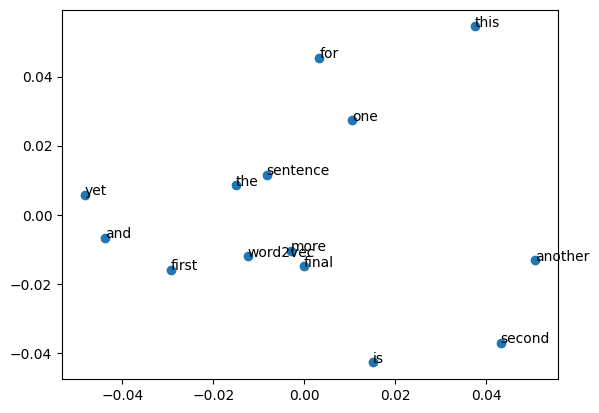

In [51]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1, vector_size=50) # vector_size (int, optional) – Dimensionality of the word vectors, essentially size of the 
# hidden layer.
# fit a 2D PCA model to the vectors
X = model.wv[model.wv.key_to_index]
print(X.shape) # Number of unique words/length of vocabulary, vs. the embedding layer size
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
     pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

So this plot represents how similar words are given there word embedding vector representation. The PCA determines the number and description of the axis. Notably first and final are reasonable close, as they denote event descriptions. The others aren't as obvious.

Then we can check some cosine distances between the vectors. Implemented manually, but also using the `most_similar` method from wv.

In [78]:
print(model.wv.key_to_index)
print(len(model.wv.key_to_index))

{'sentence': 0, 'the': 1, 'is': 2, 'this': 3, 'final': 4, 'and': 5, 'more': 6, 'one': 7, 'another': 8, 'yet': 9, 'second': 10, 'word2vec': 11, 'for': 12, 'first': 13}
14


In [67]:
def cos_dist(vec1, vec2):
    vec1_norm = np.linalg.norm(vec1)
    vec2_norm = np.linalg.norm(vec2)
    dot_prod = np.dot(vec1,vec2)
    return dot_prod/(vec1_norm*vec2_norm)

In [71]:
# X[13] corresponds to "first"
[(model.wv.index_to_key[i],cos_dist(X[i],X[13])) for i in range(0,len(model.wv.key_to_index))]

[('sentence', 0.15019883),
 ('the', -0.01201754),
 ('is', 0.020485384),
 ('this', -0.19830054),
 ('final', 0.15375377),
 ('and', 0.30655774),
 ('more', -0.014133254),
 ('one', 0.118233494),
 ('another', -0.14298055),
 ('yet', 0.12584557),
 ('second', 0.05599532),
 ('word2vec', 0.19031364),
 ('for', -0.08253041),
 ('first', 1.0)]

In [77]:
model.wv.most_similar("first",topn=len(X[0]))

[('and', 0.3065577447414398),
 ('word2vec', 0.19031362235546112),
 ('final', 0.15375375747680664),
 ('sentence', 0.150198832154274),
 ('yet', 0.12584556639194489),
 ('one', 0.11823350936174393),
 ('second', 0.055995337665081024),
 ('is', 0.020485403016209602),
 ('the', -0.012017532251775265),
 ('more', -0.014133245684206486),
 ('for', -0.0825304239988327),
 ('another', -0.14298053085803986),
 ('this', -0.1983005255460739)]